<a href="https://colab.research.google.com/github/mrizkyhasyim/hagiwara/blob/main/Hagiwara2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
df = pd.ExcelFile('/content/gdrive/MyDrive/Project/hagiwara2.xlsx')
df1 = pd.read_excel(df, 'Sheet1')
df2 = pd.DataFrame(df1)
df2

,Jarak (m),TAP,TBP
0,0.0,0.0000,0.0295
1,2.5,0.0115,0.0265
2,5.0,0.0160,0.0260
3,7.5,0.0185,0.0250
4,10.0,0.0205,0.0235
5,12.5,0.0215,0.0210
6,15.0,0.0220,0.0205
7,17.5,0.0235,0.0195
8,20.0,0.0250,0.0185
9,22.5,0.0260,0.0175


In [ ]:
TAB_A = df2.iloc[12,1] #select data from 8th row and 2nd column
TAB_B = df2.iloc[0,2] #select data from 1st row and 3rd column
TAB = (TAB_A + TAB_B)/2
TAB


0.0305

In [ ]:
A01 = df2.iloc[0,1]
B02 = df2.iloc[0,2]
TBPa = B02-((A01+B02-TAB)/2)
TBPa

0.03

In [ ]:
TAPa = []
for i, row in df2.iterrows():
   TAPa.append(row[1]-((row[2]+row[1]-TAB)/2))
   #print(row[2]-((row[2]+row[1]-TAB)/2))
TAPa

[0.0005000000000000004,
 0.00775,
 0.010250000000000002,
 0.012,
 0.013750000000000002,
 0.0155,
 0.016,
 0.01725,
 0.018500000000000003,
 0.0195,
 0.02075,
 0.024,
 0.031]

In [ ]:
TBPa = []
for i, row in df2.iterrows():
   TBPa.append(row[2]-((row[2]+row[1]-TAB)/2))
TBPa


[0.03,
 0.02275,
 0.02025,
 0.018500000000000003,
 0.01675,
 0.015000000000000003,
 0.014500000000000002,
 0.013250000000000001,
 0.012,
 0.011000000000000003,
 0.009750000000000002,
 0.006499999999999999,
 -0.0005000000000000004]

,Jarak (m),TAP,TBP,TAPa,TBPa
0,0.0,0.0000,0.0295,0.00050,0.03000
1,2.5,0.0115,0.0265,0.00775,0.02275
2,5.0,0.0160,0.0260,0.01025,0.02025
3,7.5,0.0185,0.0250,0.01200,0.01850
4,10.0,0.0205,0.0235,0.01375,0.01675
5,12.5,0.0215,0.0210,0.01550,0.01500
6,15.0,0.0220,0.0205,0.01600,0.01450
7,17.5,0.0235,0.0195,0.01725,0.01325
8,20.0,0.0250,0.0185,0.01850,0.01200
9,22.5,0.0260,0.0175,0.01950,0.01100


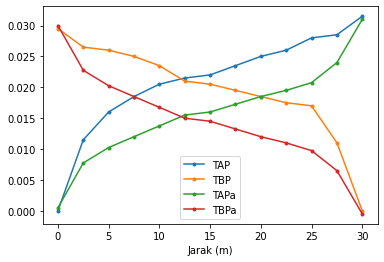

In [ ]:
df2['TAPa'] = TAPa
df2['TBPa'] = TBPa

df2
df2.plot(x='Jarak (m)', marker='.')
df2
#Review the graph to determine the lowtrend and hightrend

 Slope TAP   : 0.0032
 Intercept TAP: 0.0011666666666666665

 Slope TAP_   : 0.0005527272727272729
 Intercept TAP_: 0.014054545454545453

 Slope T'AP   : 0.0006663636363636363
 Intercept T'AP: 0.0063840909090909104

 Slope TBP   : -0.0034000000000000007
 Intercept TBP: 0.10283333333333335

 Slope TBP_   : -0.0004909090909090908
 Intercept TBP_: 0.02836363636363636

 Slope T'BP   : -0.0006663636363636366
 Intercept T'BP: 0.024115909090909098



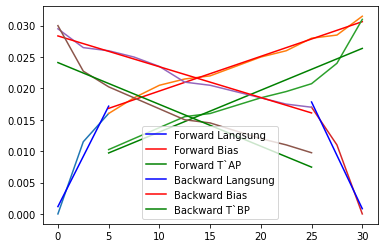

   Jarak (m)
0        0.0
1        2.5
2        5.0       TAP
0  0.0000
1  0.0115
2  0.0160


In [ ]:
from scipy.stats import linregress
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


TAPx = pd.DataFrame(df2, columns=["Jarak (m)"]) #Forward Langsung
TAPx = TAPx.loc[0:2]
TAPy = pd.DataFrame(df2, columns=["TAP"])
TAPy = TAPy.loc[0:2]

TAP_x = pd.DataFrame(df2, columns=["Jarak (m)"]) #Forward Bias
TAP_x = TAP_x.loc[2:12]
TAP_y = pd.DataFrame(df2, columns=["TAP"])
TAP_y = TAP_y.loc[2:12]

_TAPx = pd.DataFrame(df2, columns=["Jarak (m)"]) #Forward T'AP
_TAPx = _TAPx.loc[2:12]
_TAPy = pd.DataFrame(df2, columns=["TAPa"])
_TAPy = _TAPy.loc[2:12]

resTAP = linregress(df2["Jarak (m)"].loc[0:2], df2['TAP'].loc[0:2])
print(f" Slope TAP   : {resTAP.slope}\n", f"Intercept TAP: {resTAP.intercept}\n")
resTAP_ = linregress(df2["Jarak (m)"].loc[2:12], df2['TAP'].loc[2:12])
print(f" Slope TAP_   : {resTAP_.slope}\n", f"Intercept TAP_: {resTAP_.intercept}\n")
res_TAP = linregress(df2["Jarak (m)"].loc[2:12], df2['TAPa'].loc[2:12])
print(f" Slope T'AP   : {res_TAP.slope}\n", f"Intercept T'AP: {res_TAP.intercept}\n")

TBPx = pd.DataFrame(df2, columns=["Jarak (m)"]) #Backward Langsung
TBPx = TBPx.loc[10:12]
TBPy = pd.DataFrame(df2, columns=["TBP"])
TBPy = TBPy.loc[10:12]

TBP_x = pd.DataFrame(df2, columns=["Jarak (m)"]) #Backward Bias
TBP_x = TBP_x.loc[0:10]
TBP_y = pd.DataFrame(df2, columns=["TBP"])
TBP_y = TBP_y.loc[0:10]

_TBPx = pd.DataFrame(df2, columns=["Jarak (m)"]) #Backward T'AP
_TBPx = _TBPx.loc[0:10]
_TBPy = pd.DataFrame(df2, columns=["TBPa"])
_TBPy = _TBPy.loc[0:10]

resTBP = linregress(df2["Jarak (m)"].loc[10:12], df2['TBP'].loc[10:12])
print(f" Slope TBP   : {resTBP.slope}\n", f"Intercept TBP: {resTBP.intercept}\n")
resTBP_ = linregress(df2["Jarak (m)"].loc[0:10], df2['TBP'].loc[0:10])
print(f" Slope TBP_   : {resTBP_.slope}\n", f"Intercept TBP_: {resTBP_.intercept}\n")
res_TBP = linregress(df2["Jarak (m)"].loc[2:12], df2['TBPa'].loc[2:12])
print(f" Slope T'BP   : {res_TBP.slope}\n", f"Intercept T'BP: {res_TBP.intercept}\n")

plt.plot(TAPx, TAPy)#'o', label='original data'
plt.plot(TAPx, resTAP.intercept + resTAP.slope*TAPx, 'b', label='Forward Langsung')
plt.plot(TAP_x, TAP_y)
plt.plot(TAP_x, resTAP_.intercept + resTAP_.slope*TAP_x, 'r', label='Forward Bias')
plt.plot(_TAPx, _TAPy)
plt.plot(_TAPx, res_TAP.intercept + res_TAP.slope*_TAPx, 'g', label='Forward T`AP')
plt.plot(TBPx, TBPy)#'o', label='original data'
plt.plot(TBPx, resTBP.intercept + resTBP.slope*TBPx, 'b', label='Backward Langsung')
plt.plot(TBP_x, TBP_y)
plt.plot(TBP_x, resTBP_.intercept + resTBP_.slope*TBP_x, 'r', label='Backward Bias')
plt.plot(_TBPx, _TBPy)
plt.plot(_TBPx, res_TBP.intercept + res_TBP.slope*_TBPx, 'g', label='Backward T`BP')
plt.legend()
plt.show()
print(TAPx, TAPy)

In [ ]:
import matplotlib.pyplot as plt
jarak = df2.columns.str.('Jarak (m)')

# Convert year values to integers, saving results back to dataframe

df2.columns = jarak.astype(int)



SyntaxError: ignored

In [ ]:
H = []
for i, row in df2.iterrows():
   H.append()
H